In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
import tensorflow as tf
import warnings # Supress warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Thesis/Datasets

Mounted at /content/drive
/content/drive/MyDrive/Thesis/Datasets


# Function Definition

In [ ]:
def convert_to_time_df(df):
  # Convert 'Order Date' column to proper date format and rename it to 'Date'
  df['Date'] = pd.to_datetime(df['Order Date'], infer_datetime_format=True)

  # Divide the dataset according to categories
  category_data = {}
  for category, data in df.groupby('Category'):
      category_data[category] = data

  # Create a new DataFrame for time df data
  df = pd.DataFrame()

  # Iterate over each category
  for category, data in category_data.items():
      # Resample the data by day and sum the sales
      daily_sales = data.resample('D', on='Date')['Sales'].sum().astype(int)

      # Add the daily sales data to the time df DataFrame
      df[category] = daily_sales

  # Print the resulting time df data
  print(len(df))
  print(df.head(28))
  return df

# Data Selection

In [ ]:
sample_superstore = pd.read_csv('sample_superstore.csv', encoding='ISO-8859-1')

In [ ]:
sample_superstore.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,5/4/2017,5/9/2017,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


# Conversion to Time Series

In [ ]:
df = convert_to_time_df(sample_superstore) # new

1455
            Furniture  Office Supplies  Technology
Date                                              
2014-01-06       2573              685        1147
2014-01-07         76               10           0
2014-01-08          0                0           0
2014-01-09          0                9          31
2014-01-10         51                2           0
2014-01-11          9                0           0
2014-01-12          0                0           0
2014-01-13        879             2027         646
2014-01-14         61                0           0
2014-01-15          0                0         149
2014-01-16        127               48         124
2014-01-17          0                0           0
2014-01-18          0               64           0
2014-01-19        181              197           0
2014-01-20       1413              560         699
2014-01-21         25                0           0
2014-01-22          0                0           0
2014-01-23          0     

In [ ]:
print(len(df))
print(df.iloc[1090])

1455
Furniture            0
Office Supplies    429
Technology         302
Name: 2016-12-31 00:00:00, dtype: int64


# Resampling

Resampling data into months

In [ ]:
# Resample the data into monthly intervals
monthly_data = df.resample('M').sum()
# calculate total no of months
num_months = len(monthly_data.index)
print("Number of months:", num_months)

# Parameters
months = np.arange(num_months, dtype="float32")

Number of months: 48


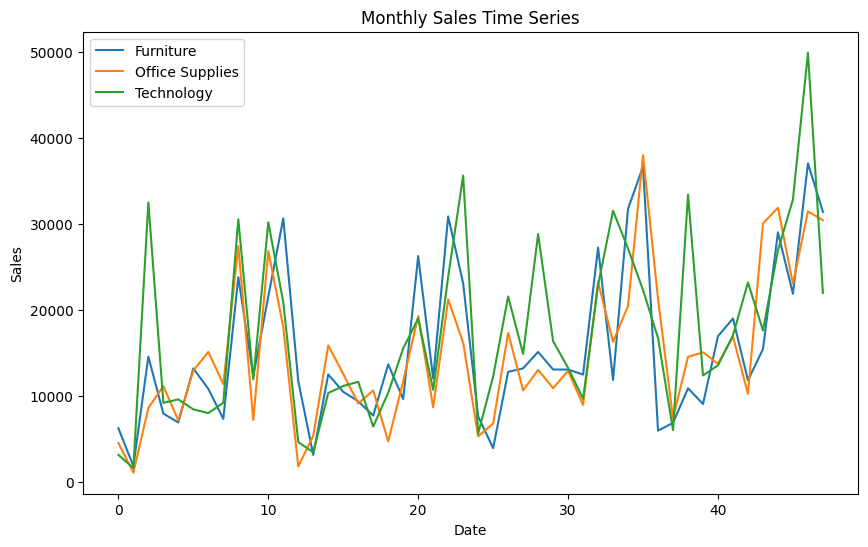

In [ ]:
# Plot the resampled data as a line graph
plt.figure(figsize=(10, 6))
for category in monthly_data.columns:
    plt.plot(months, monthly_data[category], label=category, linestyle='-')

plt.title("Monthly Sales Time Series")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

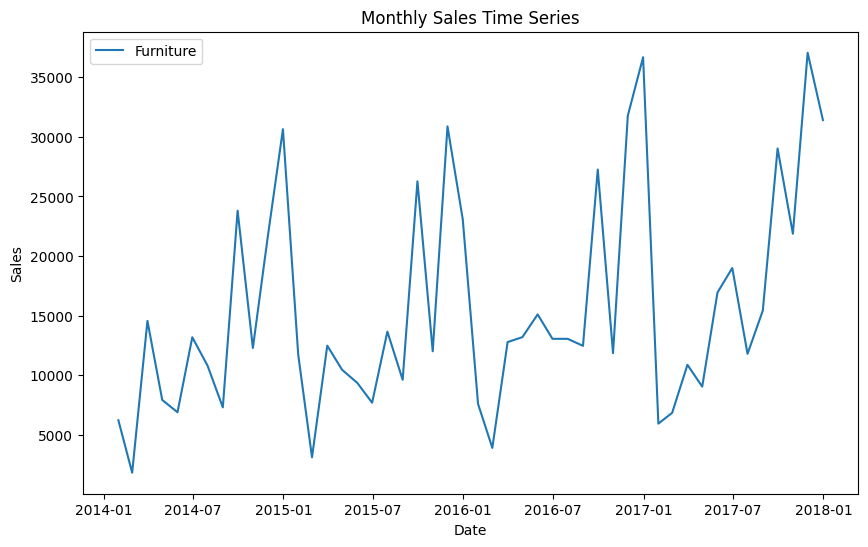

In [ ]:
# Plot the resampled data as a line graph
plt.figure(figsize=(10, 6))
plt.plot(monthly_data.index, monthly_data['Furniture'], label='Furniture', linestyle='-')

plt.title("Monthly Sales Time Series")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

Resampling into weeks

In [ ]:
# Resample the data into monthly intervals
weekly_data = df.resample('W').sum()
# calculate total no of months
num_weeks = len(weekly_data.index)
print("Number of weeks:", num_weeks)

# Parameters
weeks = np.arange(num_weeks, dtype="float32")

Number of weeks: 208


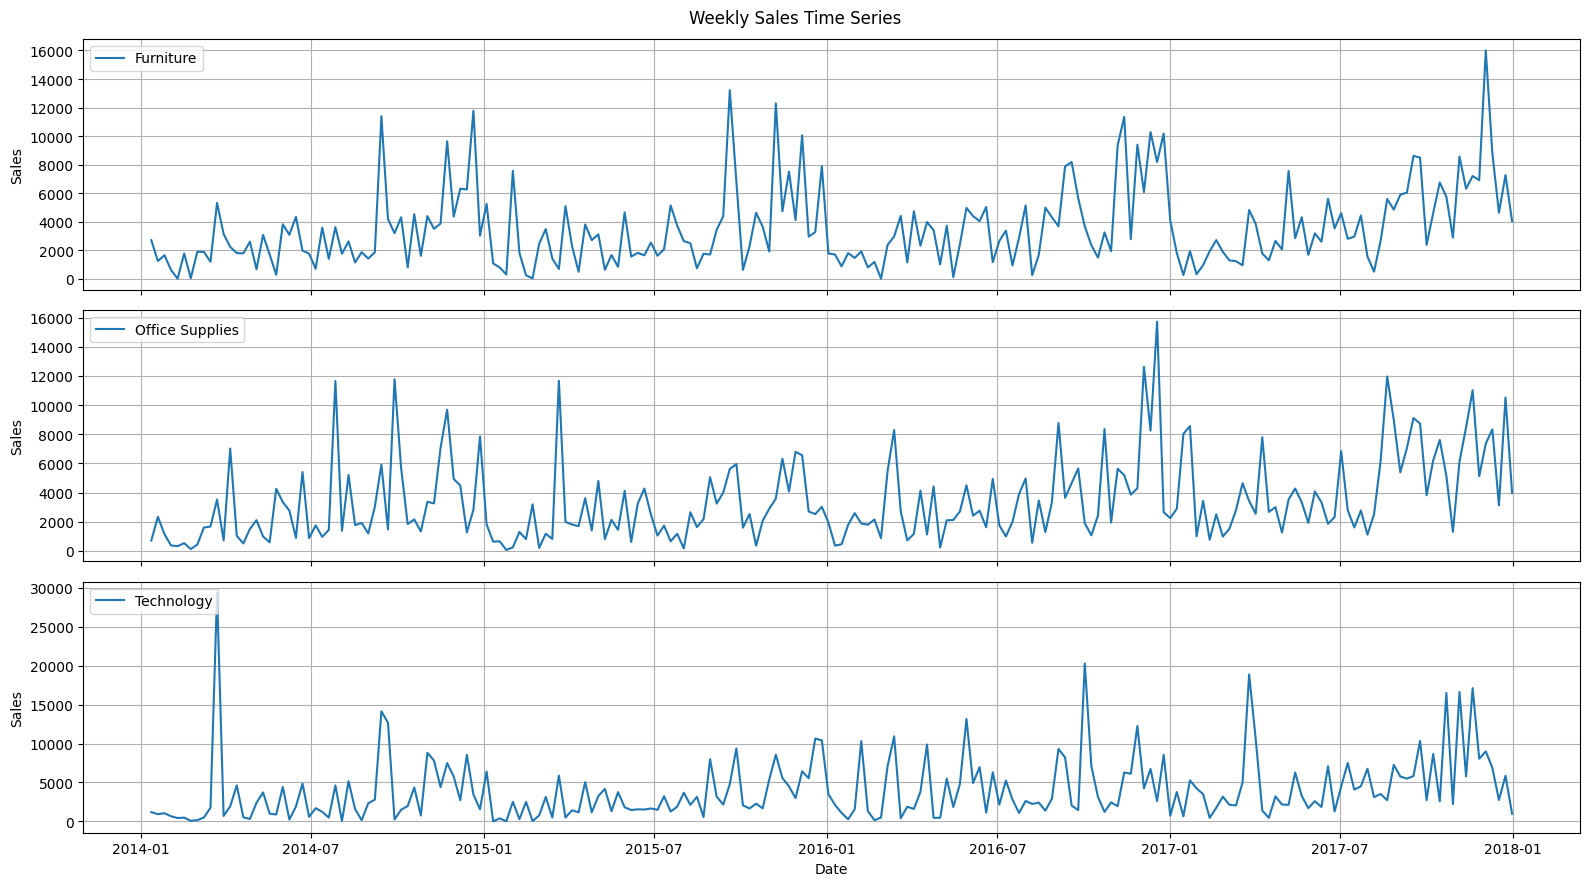

In [ ]:
# Plot the resampled data as subplots
fig, axes = plt.subplots(nrows=len(weekly_data.columns), figsize=(16, 9), sharex=True)
for idx, category in enumerate(weekly_data.columns):
    axes[idx].plot(weekly_data.index, weekly_data[category], label=category, linestyle='-')
    axes[idx].set_ylabel("Sales")
    axes[idx].legend(loc="upper left")
    axes[idx].grid(True)

plt.suptitle("Weekly Sales Time Series")
plt.xlabel("Date")
plt.tight_layout()
plt.show()


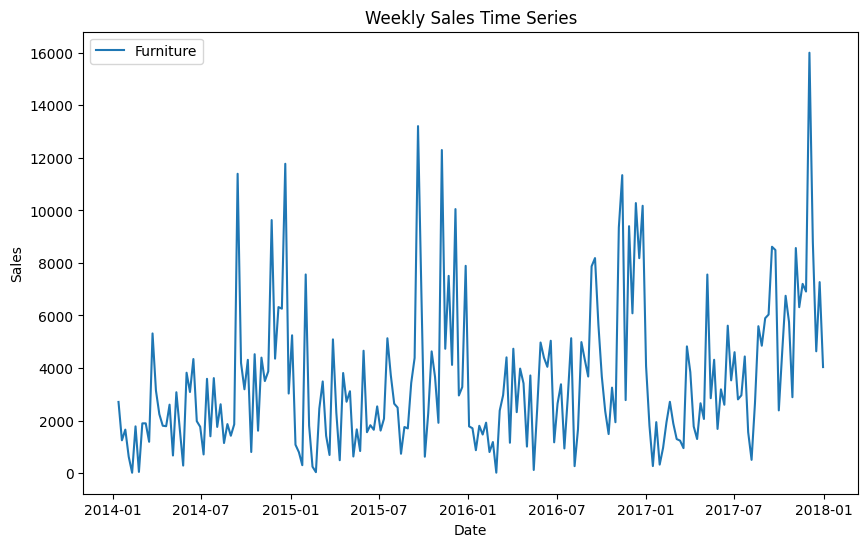

In [ ]:
# Plot the resampled data as a line graph
plt.figure(figsize=(10, 6))
plt.plot(weekly_data.index, weekly_data['Furniture'], label='Furniture', linestyle='-')

plt.title("Weekly Sales Time Series")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

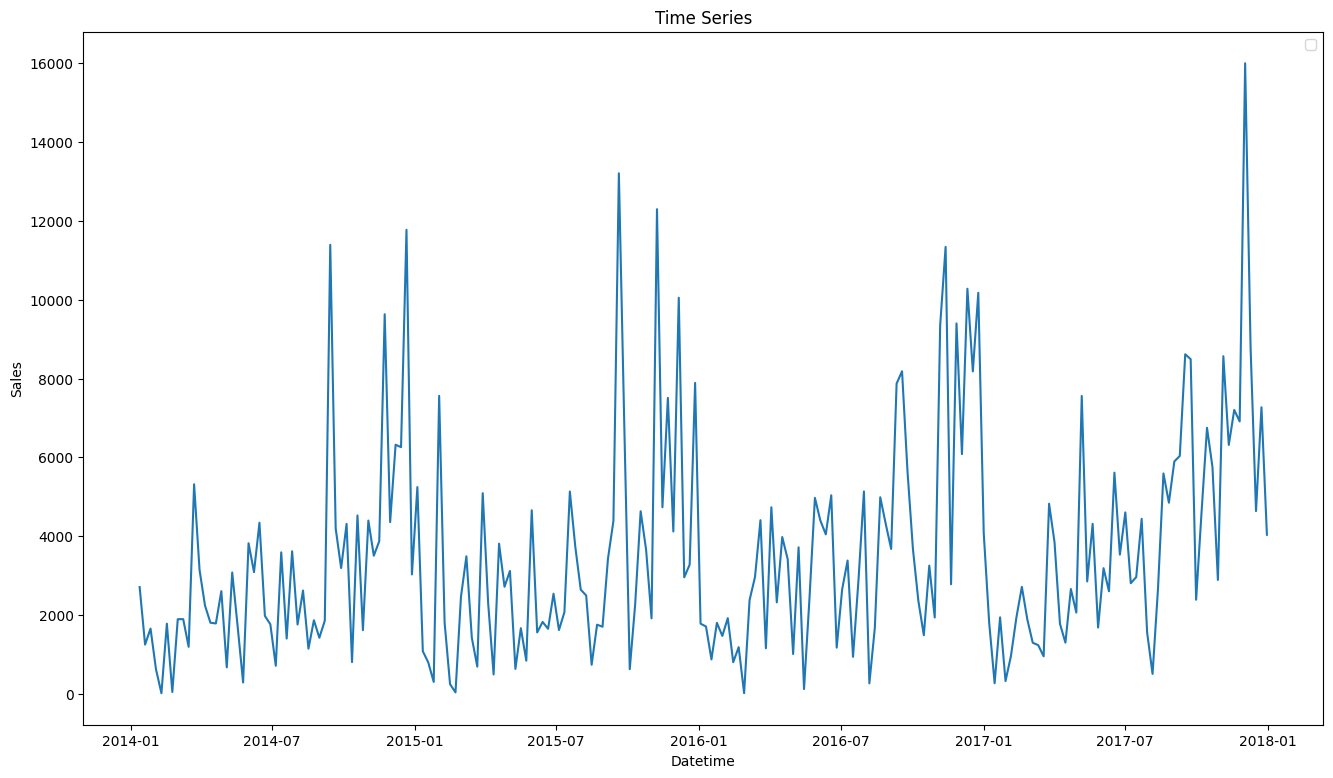

In [ ]:
# Plot the resampled data as a line graph
plt.figure(figsize=(16, 9))
plt.plot(weekly_data.index, weekly_data['Furniture'], linestyle='-')

plt.title("Time Series")
plt.xlabel("Datetime")
plt.ylabel("Sales")
plt.legend()
plt.show()

# Normalization

Monthly Data

In [ ]:
monthly_data['Furniture'] = monthly_data["Furniture"] / 1000

Weekly Data

In [ ]:
weekly_data['Furniture'] = weekly_data["Furniture"] / 1000
#weekly_data['Furniture'] = weekly_data["Furniture"]

Check for missing values

In [ ]:
w = weekly_data.copy()
# Replace all 0 values with NaN (missing values)
w.replace(0, np.nan, inplace=True)
w.isna().sum()

Furniture          0
Office Supplies    0
Technology         2
dtype: int64

Z-score

In [ ]:
import pandas as pd

# Assuming df is your time series data with outliers

# Step 1: Define the window size for the rolling z-score method
window_size = 13 # 4 weeks = 1 month

# Step 2: Calculate the rolling mean and standard deviation
rolling_mean = w['Furniture'].rolling(window=window_size, min_periods=1).mean()
rolling_std = w['Furniture'].rolling(window=window_size, min_periods=1).std()

# Step 3: Calculate the z-score for each data point
z_score = (w['Furniture'] - rolling_mean) / rolling_std
print(z_score.mean())
# Step 4: Define the threshold for outliers (e.g., z-score > 2.5)
threshold = 2

# Step 5: Identify and flag outliers
outliers = abs(z_score) > threshold
w['is_outlier'] = outliers

# Step 6: Replace outliers with the moving average
w.loc[outliers, 'Furniture'] = rolling_mean[outliers]

# Step 7: Count the number of outliers after replacement
num_outliers_after_replacement = w['is_outlier'].sum()

# Print the number of outliers after replacement
print("Number of outliers after replacement:", num_outliers_after_replacement)

# Count the number of outliers for each month after replacement
outliers_by_weeks_after_replacement = w.groupby(w.index.week)['is_outlier'].sum()

# Print the number of outliers for each month after replacement
print("Number of outliers by month after replacement:")
print(outliers_by_weeks_after_replacement)

0.1133489574632652
Number of outliers after replacement: 11
Number of outliers by month after replacement:
Date
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    2
13    1
14    0
15    0
16    0
17    0
18    1
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    1
30    0
31    0
32    0
33    0
34    0
35    0
36    1
37    2
38    1
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    1
49    0
50    0
51    1
52    0
53    0
Name: is_outlier, dtype: int64


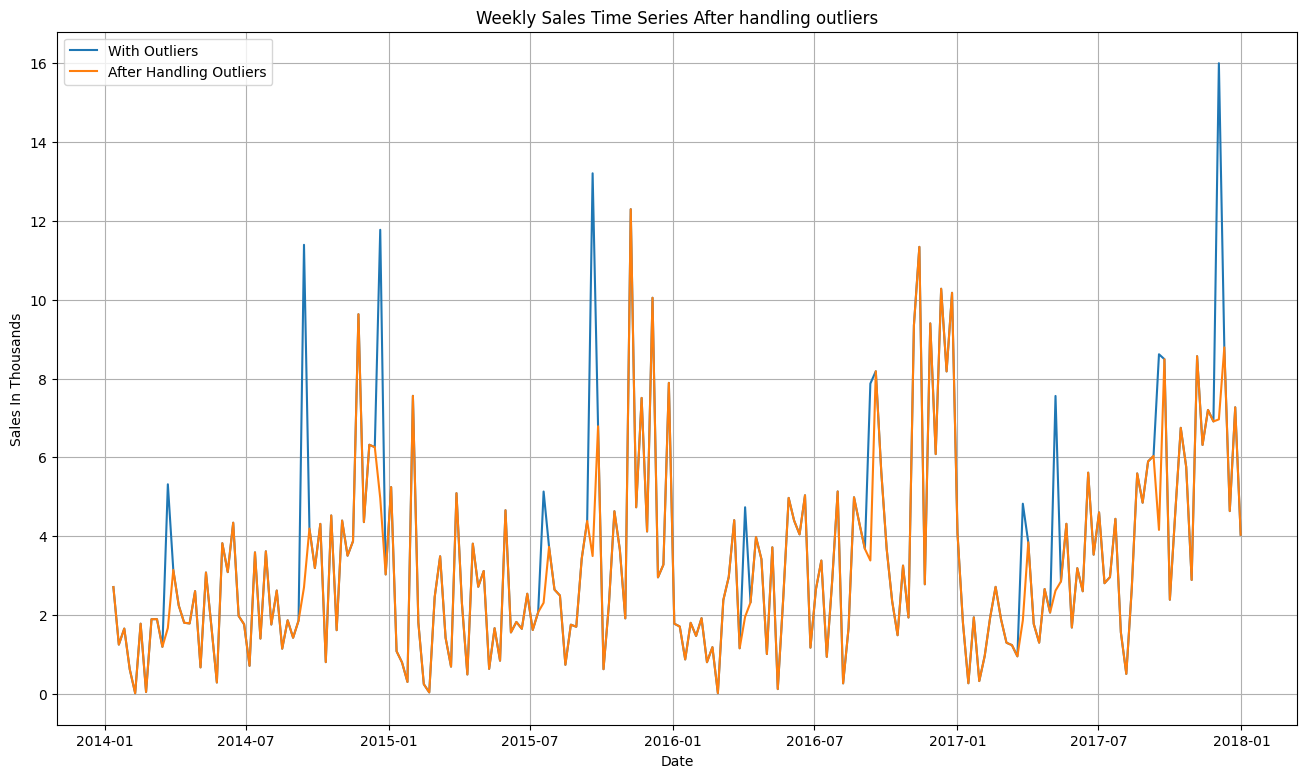

In [ ]:
# Plot the resampled data as a line graph
plt.figure(figsize=(16, 9))
plt.plot(weekly_data.index, weekly_data['Furniture'], label='With Outliers', linestyle='-')
plt.plot(w.index, w['Furniture'], label='After Handling Outliers', linestyle='-')

plt.title("Weekly Sales Time Series After handling outliers")
plt.xlabel("Date")
plt.ylabel("Sales In Thousands")
plt.legend()
plt.grid(True)
plt.show()

# Save Preprocessed Data

In [ ]:
sales_df = pd.DataFrame({
    'sales': monthly_data['Furniture'].round(2)
}, index=monthly_data.index)

sales_df.to_csv('monthly_sales_data.csv')

In [ ]:
sales_df = pd.DataFrame({
    'sales': w['Furniture'].round(2)
}, index=w.index)

sales_df.to_csv('weekly_sales_data.csv')

In [ ]:
print(monthly_data)

            Furniture  Office Supplies  Technology
Date                                              
2014-01-31      6.235             4520        3139
2014-02-28      1.838             1062        1604
2014-03-31     14.564             8597       32500
2014-04-30      7.939            11142        9184
2014-05-31      6.904             7123        9588
2014-06-30     13.194            12941        8428
2014-07-31     10.812            15112        7993
2014-08-31      7.315            11372        9202
2014-09-30     23.803            27412       30528
2014-10-31     12.294             7196       11923
2014-11-30     21.555            26849       30186
2014-12-31     30.635            17992       20883
2015-01-31     11.734             1802        4623
2015-02-28      3.131             5362        3442
2015-03-31     12.490            15869       10332
2015-04-30     10.468            12547       11149
2015-05-31      9.366             9101       11635
2015-06-30      7.705          

In [ ]:
print(w.round(2))

            Furniture  Office Supplies  Technology  is_outlier
Date                                                          
2014-01-12       2.71              706      1178.0       False
2014-01-19       1.25             2336       919.0       False
2014-01-26       1.66             1142      1042.0       False
2014-02-02       0.62              366       648.0       False
2014-02-09       0.01              318       421.0       False
...               ...              ...         ...         ...
2017-12-03       6.97             7358      8982.0        True
2017-12-10       8.79             8336      6872.0       False
2017-12-17       4.64             3116      2734.0       False
2017-12-24       7.27            10523      5857.0       False
2017-12-31       4.04             3964       971.0       False

[208 rows x 4 columns]
